In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from numpy.linalg import svd

class CA(object):
    """Simple corresondence analysis.
    
    Inputs
    ------
    ct : array_like
      Two-way contingency table. If `ct` is a pandas DataFrame object,
      the index and column values are used for plotting.
    """

    def __init__(self, ct):
        self.rows = ct.index.values if hasattr(ct, 'index') else None
        self.cols = ct.columns.values if hasattr(ct, 'columns') else None
        
        # contingency table
        N = np.matrix(ct, dtype=float)

        # correspondence matrix from contingency table
        P = N / N.sum()

        # row and column marginal totals of P as vectors
        r = P.sum(axis=1)
        c = P.sum(axis=0).T

        # diagonal matrices of row/column sums
        D_r_rsq = np.diag(1. / np.sqrt(r.A1))
        D_c_rsq = np.diag(1. / np.sqrt(c.A1))

        # the matrix of standarized residuals
        S = D_r_rsq * (P - r * c.T) * D_c_rsq

        # compute the SVD
        U, D_a, V = svd(S, full_matrices=False)
        D_a = np.asmatrix(np.diag(D_a))
        V = V.T

        # principal coordinates of rows ############################
        F = D_r_rsq * U * D_a

        # principal coordinates of columns
        G = D_c_rsq * V * D_a

        # standard coordinates of rows
        X = D_r_rsq * U

        # standard coordinates of columns ##########################
        Y = D_c_rsq * V

        # the total variance of the data matrix
        inertia = sum([(P[i,j] - r[i,0] * c[j,0])**2 / (r[i,0] * c[j,0])
                       for i in range(N.shape[0])
                       for j in range(N.shape[1])])

        self.F = F.A
        self.G = G.A
        self.X = X.A
        self.Y = Y.A
        self.inertia = inertia
        self.eigenvals = np.diag(D_a)**2

    def plot(self):
        """Plot the first and second dimensions."""
        xmin, xmax = None, None
        ymin, ymax = None, None
        if self.rows is not None:
            for i, t in enumerate(self.rows):
                x, y = self.F[i,0], self.F[i,1]
                plt.text(x, y, t, va='center', ha='center', color='r')
                xmin = min(x, xmin if xmin else x)
                xmax = max(x, xmax if xmax else x)
                ymin = min(y, ymin if ymin else y)
                ymax = max(y, ymax if ymax else y)
        else:
            plt.plot(self.F[:, 0], self.F[:, 1], 'ro')

        if self.cols is not None:
            for i, t in enumerate(self.cols):
                x, y = self.G[i,0], self.G[i,1]
                plt.text(x, y, t, va='center', ha='center', color='b')
                xmin = min(x, xmin if xmin else x)
                xmax = max(x, xmax if xmax else x)
                ymin = min(y, ymin if ymin else y)
                ymax = max(y, ymax if ymax else y)
        else:
            plt.plot(self.G[:, 0], self.G[:, 1], 'bs')

        if xmin and xmax:
            pad = (xmax - xmin) * 0.1
            plt.xlim(xmin - pad, xmax + pad)
        if ymin and ymax:
            pad = (ymax - ymin) * 0.1
            plt.ylim(ymin - pad, ymax + pad)

        plt.grid()
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')

In [2]:
df = pd.read_csv("20110810_preprocessing.txt")

In [3]:
df_caregorical = df[["SrcAddr","Proto","Sport","Dir","Dport","State","label"]]

print (df_caregorical.label.value_counts())

0    2783675
1      40961
Name: label, dtype: int64


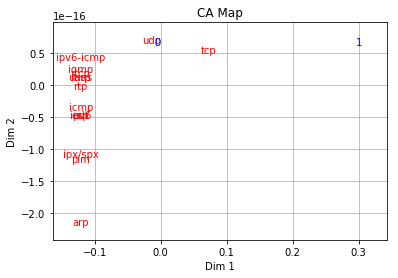

In [26]:
table = pd.crosstab(
    index = df_caregorical["Proto"], columns = df_caregorical["label"], margins = False)

ca = CA(table)

plt.figure(100)
ca.plot()
plt.title("CA Map")
plt.show()

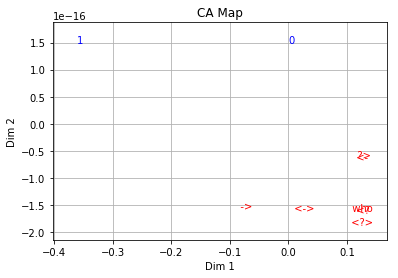

In [27]:
table = pd.crosstab(
    index = df_caregorical["Dir"], columns = df_caregorical["label"], margins = False)

ca = CA(table)

plt.figure(100)
ca.plot()
plt.title("CA Map")
plt.show()

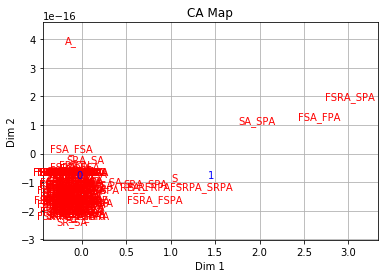

In [28]:
table = pd.crosstab(
    index = df_caregorical["State"], columns = df_caregorical["label"], margins = False)

ca = CA(table)

plt.figure(100)
ca.plot()
plt.title("CA Map")
plt.show()

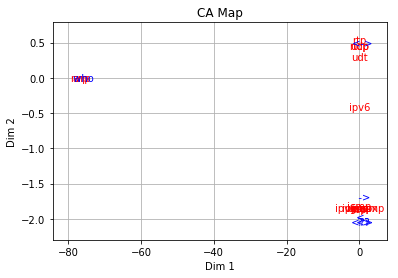

In [29]:
table = pd.crosstab(
    index = df_caregorical["Proto"], columns = df_caregorical["Dir"], margins = False)

ca = CA(table)

plt.figure(100)
ca.plot()
plt.title("CA Map")
plt.show()

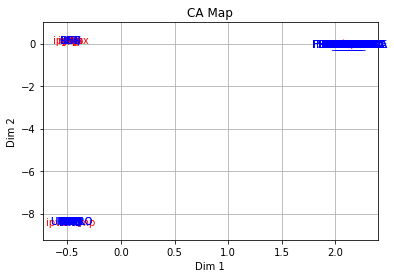

In [30]:
table = pd.crosstab(
    index = df_caregorical["Proto"], columns = df_caregorical["State"], margins = False)

ca = CA(table)

plt.figure(100)
ca.plot()
plt.title("CA Map")
plt.show()

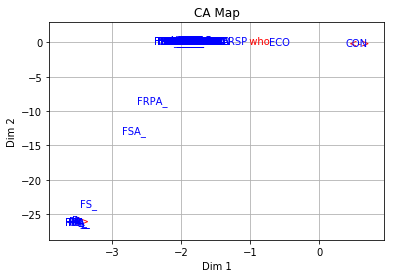

In [31]:
table = pd.crosstab(
    index = df_caregorical["Dir"], columns = df_caregorical["State"], margins = False)

ca = CA(table)

plt.figure(100)
ca.plot()
plt.title("CA Map")
plt.show()